## Problem : 2250. Count Number of Rectangles Containing Each Point
https://leetcode.com/problems/count-number-of-rectangles-containing-each-point/description/

You are given a 2D integer array rectangles where rectangles[i] = [li, hi] indicates that ith rectangle has a length of li and a height of hi. You are also given a 2D integer array points where points[j] = [xj, yj] is a point with coordinates (xj, yj).

The ith rectangle has its bottom-left corner point at the coordinates (0, 0) and its top-right corner point at (li, hi).

Return an integer array count of length points.length where count[j] is the number of rectangles that contain the jth point.

The ith rectangle contains the jth point if 0 <= xj <= li and 0 <= yj <= hi. Note that points that lie on the edges of a rectangle are also considered to be contained by that rectangle.

Example:
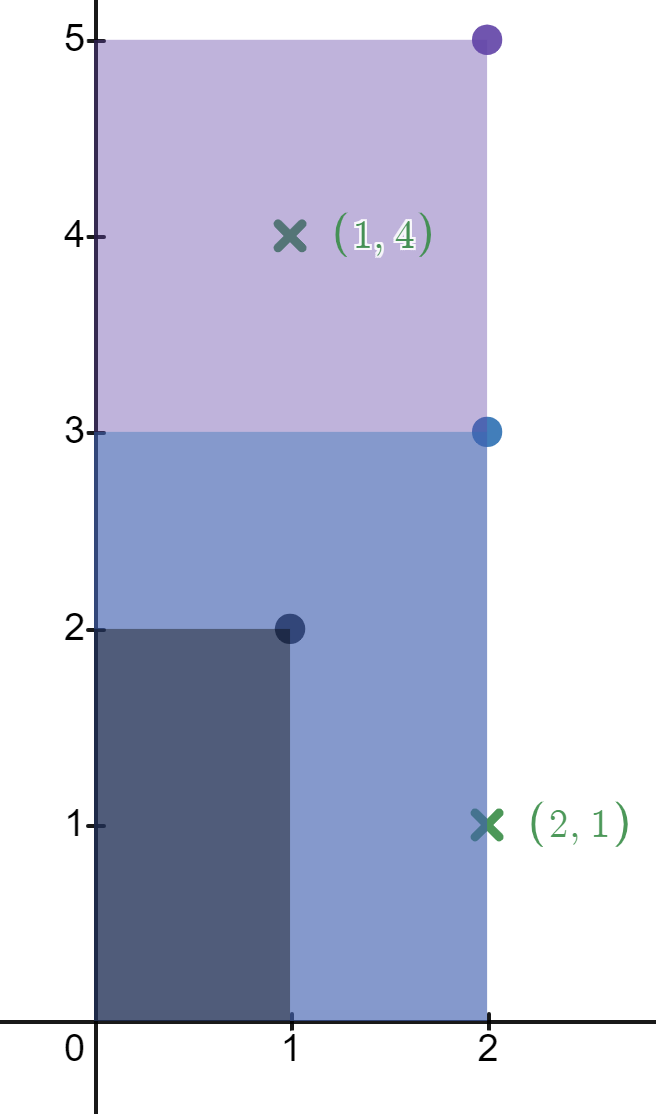
Input: rectangles = [[1,2],[2,3],[2,5]], points = [[2,1],[1,4]]

Output: [2,1]

Explanation: 

The first rectangle contains no points.
The second rectangle contains only the point (2, 1).
The third rectangle contains the points (2, 1) and (1, 4).
The number of rectangles that contain the point (2, 1) is 2.
The number of rectangles that contain the point (1, 4) is 1.
Therefore, we return [2, 1].

Constraints:

1 <= rectangles.length, points.length <= 5 * 104

rectangles[i].length == points[j].length == 2

1 <= li, xj <= 109

1 <= hi, yj <= 100

All the rectangles are unique.

All the points are unique.


In [5]:
def countNumOfRect(rectangles, points):
    rect_map = {}
    
    # As per constraints, number of y in points and number of height in rectangle would be max 100.
    # So, we will loop through y. 
    # create a hashmap with key = y. Each Y can have x may be 1 or may be miultiple.
    # Also, to find the point, we can search via binary search. For that, we will have to sort the x for each y.
    for x, y in rectangles:
        if y in rect_map:
            rect_map[y].append(x)
        else:
            rect_map[y] = [x]
    # sort x for each y.
    for _, val in rect_map.items():
        val.sort()
    
    # now try to find points.
    # search y of points in rect_map. To have points in side of rect, y should be equal or smaller than height
    # in rect_map. 
    # Once y is find, then search x for linked to same height. As x(widths) are sorted, so will use Binary search.
    # This is efficient for large value of widths (look at constraints).

    counts = []

    for x, y in points:
        count = 0
        for height, widths in rect_map.items():
            if height >= y:
                count += len(widths) - binarySearch(widths, x) 
                ## Search x in widths such that x <= width, then points will be accomodated all rectangles
                ## having smaller widths. So, count  = total widths - index of x<=width.
        counts.append(count)
    return counts

def binarySearch(array, val):
    retIndex = len(array) # if suitable index for x is not found then return length of array.
                            # so, that count = 0
    l, r = 0, len(array)-1
    while l <= r:
        mid = l+(r-l)//2
        if array[mid]>= val:
            r = mid-1
            retIndex = mid
        else:
            l = mid+1
    return retIndex       

In [6]:
rectangles = [[1,2],[2,3],[2,5]]
points = [[2,1],[1,4]]
countNumOfRect(rectangles, points)

[2, 1]